In [159]:
import numpy as np
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

In [187]:
#Parametros del problema
beta=0.98  #Factor de descuento intertemporal
sigma=1.5  #Coeficiente de aversion al riesgo
T=70       #Horizonte de vida
A_0=0     #Valor del stock inicial de activos
A_T=0      #Herencia

1. Escriba un programa que encuentre la senda óptima de Ct y At de Leo Messi a lo largo de su vida, dadas unas sendas de ingreso {Yt}, un valor para la tasa de interés bruta R y un valor de φ.

In [110]:
#Sendas para la tasa de interes bruta R
'R=1/beta'          #Perfil de consumo constante a traves del tiempo
R=1/(beta-0.02)     #Perfil de consumo creciente(Se endeuda)#
'R=1/beta+0.02'     #Perfil de consumo decreciente(Ahorra)#

R

1.0416666666666667

In [148]:
# Proceso para el ingreso de Messi hasta su retiro a los 40 años.
yt=np.ones(T+1)
for i in range (40,T+1):
    yt[i]=0
yt

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

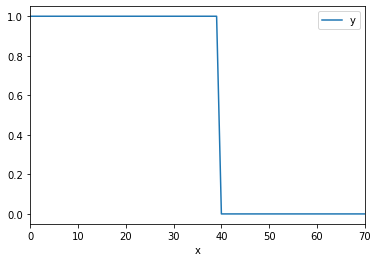

In [175]:
# Grafica de Ingresos de Messi a lo largo de su vida, hasta retirarse a los 40 años.

years=np.arange(T+1)
years

df = pd.DataFrame({"x" : years,"y" : yt})
graf=df.plot(x='x',y='y')
grafica=graf.figure
grafica.savefig("grafica Ingresos Messi.pdf")


In [251]:
#Funcion de utilidad instantanea de Messi
def U_t(C):
    if sigma==1:
        U_t=log(C)
    else:
        U_t=(C^(1-sigma)-1)/(1-sigma)

# Funcion objetivo de Leo
def messi_func(A_vec):
    A_vec_lag=np.arange(A_0,A_vec)          # Vector con el rezago de los acivos
    A_vec=np.arange(A_vec, A_T)             # Vector de activos
    
    C_vec=[]                                # Vector de consumo en cada periodo
    i=0
    while i <= T:
        C_vec.append(R*A_vec_lag[i]+yt[i]-A_vec[i])       # Vector de consumo en cada periodo
        i+=1
        
    beta_vec=[]                             # Vector con tasas de descuento
    i=0
    while k <= T:
        beta_vec.append(beta**i)               
        k+=1
        
    bienestar = sum(beta_vec*U_t(C_vec))  # Funcion objetivo del problema

    return(-bienestar)


Solucion cuando sigma = 1

In [252]:
#Condiciones iniciales
#calcular el valor presente del ingreso de Messi Y barra :
Y_barra=[]
i=0
while i <= (T):
    Y_barra.append(yt[i]/(R**i))
    i+=1
suma=sum(Y_barra)
suma


20.11584621111698

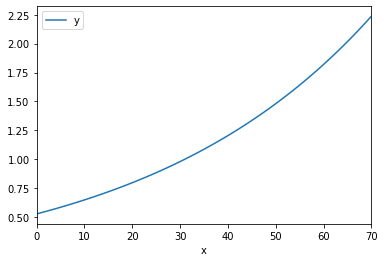

In [253]:
#consumo de Messi en t = 0
C0=((1-beta)/(1-beta**(T+1)))*suma
#C0

#Vector de Consumo a lo largo del tiempo
C_initval=[] 
i=0
while i <= (T):
    C_initval.append(((beta*R)**(i))*C0)
    i+=1
#C_initval

df = pd.DataFrame({"x" : years,"y" : C_initval})
graf=df.plot(x='x',y='y')
grafica=graf.figure
grafica.savefig("grafica Consumo Messi.pdf")

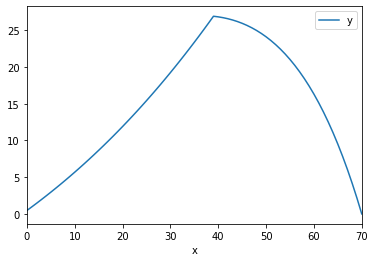

In [194]:
# Activos de Messi
A_initval =[]
A_initval.append(R*A_0+yt[0]-C_initval[0])
i=1
while i <= (T):
    A_initval.append(R*A_initval[i-1]+yt[i]-C_initval[i])
    i+=1

#A_initval
df = pd.DataFrame({"x" : years,"y" : A_initval})
graf=df.plot(x='x',y='y')
grafica=graf.figure
grafica.savefig("grafica Ahorro Messi.pdf")

Solucion cuando sigma != 1

Procedimiento #1: Fallido. Error en la funcion de Optimizacion

In [254]:
#punto Inicial
L0=A_initval

#Funcion de Optimizacion
soluc=minimize(messi_func, L0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Procedimiento #2:Fallido. Error en la funcion de Optimizacion

In [239]:
#Dadas las condiciones iniciales:
#beta=0.98  #Factor de descuento intertemporal
#sigma=1.5  #Coeficiente de aversion al riesgo
#T=70       #Horizonte de vida
#A_0=0     #Valor del stock inicial de activos
#A_T=0      #Herencia
phi=0
#Funcion Objetivo
def func_Objt(x):
    sumatoria=[]
    i=0
    while i <= T:
        sumatoria.append(-((beta**[i])*(((x[i])**(1-sigma))/(1-sigma))))
        i+=1
    return sum(sumatoria)

#Restricciones
def restriccion1(x):
    for i in range(T+1):
        return yt[i]-x[i]-A_initval[i]

def restriccion2(x):
    for i in range(T+1):
        return A_initval[i]+phi

def restriccion3(x):
    for i in range(T+1):
        return x[i]

In [249]:
sumatoria=[]
i=0
while i <= T:
    sumatoria.append(-1*((beta**[i])*((C_initval[i]**(1-sigma))/(1-sigma))))
    i+=1
return sum(sumatoria)

TypeError: unsupported operand type(s) for ** or pow(): 'float' and 'list'

In [240]:
rest1={'type':'ineq', 'fun':restriccion1}
rest2={'type':'ineq', 'fun':restriccion2}
rest3={'type':'ineq', 'fun':restriccion3}
restricciones=[rest1,rest2,rest3]

In [241]:
#Condiciones Iniciales
L0=C_initval
sol= minimize(func_Objt, L0,constraints=restricciones)

TypeError: unsupported operand type(s) for ** or pow(): 'float' and 'list'

2. Asuma que Yt_barra = Y = 1 para todo t y que φ → ∞. En una misma gráfica, muestre las sendas de Ct y At cuando:\
(a) R =1/β \
(b) R =1/β − 0.02 \
(c) R =1/β + 0.02